# Artificial Intelligence Laboratory 3: Bayesian Network

#### Bodson Fabrice, Ensay Mery

This lab is designed to introduce you the use of Bayesian Network and Naive Bayes algorithm. By the end of this lab you will:

- Learn how to construct Bayesian Network from data.
- Learn how to implement Naive Bayes algorithm for classification tasks.
- Learn how to use Bayesian Network and Naive Bayes for inference.

Environment setup
In this lab, we work with the <a href="https://erdogant.github.io/bnlearn/pages/html/index.html">bnlearn</a> library.

In [2]:
!pip install xlrd pandas
!pip install bnlearn

# Part A: Bayesian Networks

In this notebook, we will use bnlearn package to generate Bayesian Networks, based on structure learning and parameter learning. The generated Bayesian Networks will be used for inference. Using bnlearn package to learn a Bayesian network can be split into two problems:

- Structure learning: Given a set of data samples, estimate a DAG that captures the dependencies between the variables.

- Parameter learning: Given a set of data samples and a DAG that captures the dependencies between the variables, estimate the (conditional) probability distributions of the individual variables.


### Example: Building Bayesian Network and making inferences with Sprinkler data set

In [3]:
import bnlearn as bn

# load the Sprinkler dataset
df = bn.import_example()

df


,Cloudy,Sprinkler,Rain,Wet_Grass
0,0,0,0,0
1,1,0,1,1
2,0,1,0,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
995,1,0,1,1
996,1,0,1,1
997,1,0,1,1
998,0,0,0,0


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


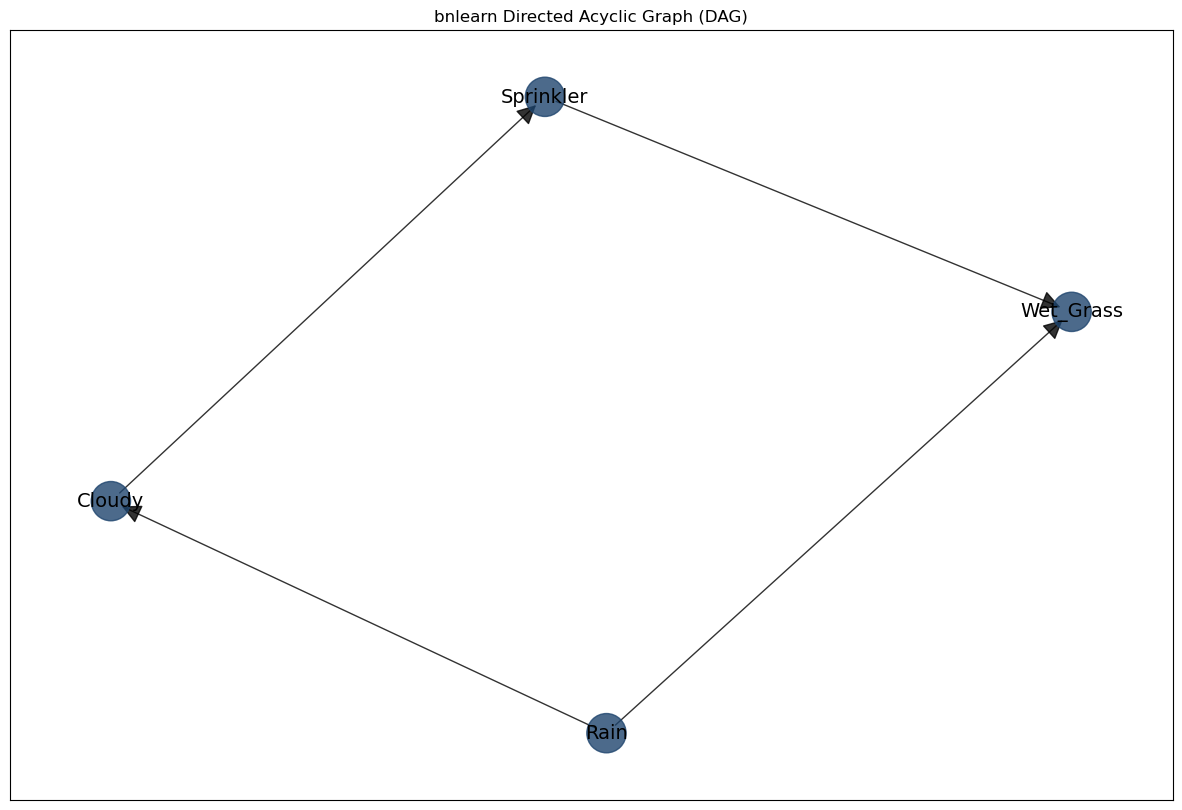

In [4]:
# Structure Learning: obtaining the network structure

model = bn.structure_learning.fit(df)

G = bn.plot(model)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cloudy:
+-----------+--------------------+--------------------+
| Rain      | Rain(0)            | Rain(1)            |
+-----------+--------------------+--------------------+
| Cloudy(0) | 0.6538071065989848 | 0.3389162561576355 |
+-----------+--------------------+--------------------+
| Cloudy(1) | 0.3461928934010152 | 0.6610837438423646 |
+-----------+--------------------+--------------------+
[bnlearn] >CPD of Sprinkler:
+--------------+--------------------+--------------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)          |
+--------------+--------------------+--------------------+
| Sprinkler(0) | 0.4807692307692308 | 0.7075098814229249 |
+--------------+--------------------+--------------------+
| Sprinkler(1) | 0.5192307692307693 | 0.2924901185770751 |
+----

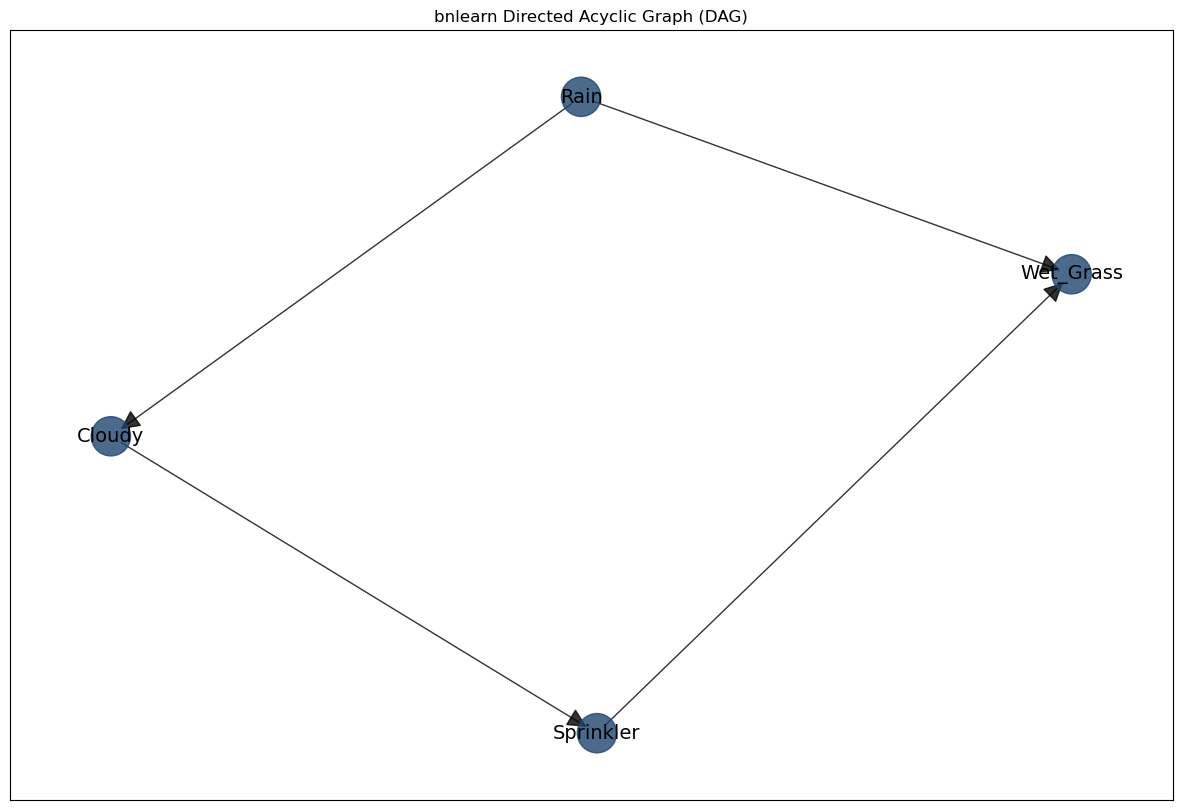

In [5]:
# learn the parameters of the DAG using the df
model_update = bn.parameter_learning.fit(model, df, methodtype="bayes")

# Make plot
G = bn.plot(model_update)


In [6]:
# performing inference
q_1 = bn.inference.fit(model_update, variables=['Wet_Grass'], evidence={'Cloudy':1,'Sprinkler':0, 'Rain':1})
q_2 = bn.inference.fit(model_update, variables=['Wet_Grass'], evidence={'Rain':1})

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-------------+----------+
|    |   Wet_Grass |        p |
+====+=============+==========+
|  0 |           0 | 0.255882 |
+----+-------------+----------+
|  1 |           1 | 0.744118 |
+----+-------------+----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-------------+----------+
|    |   Wet_Grass |        p |
+====+=============+==========+
|  0 |           0 | 0.301393 |
+----+-------------+----------+
|  1 |           1 | 0.698607 |
+----+-------------+----------+


# Smart Grid Dataset

In this lab, you will work with an artificial smart grid dataset to construct Bayesian Networks. In the Lab3.zip, you can find the records of failures in smart grids with the specified conditions in which the failures have happened: an artificial failure dataset (smart_grid.xlsx), containing 700 observations. The attributes in this dataset are: Number of Customers, Time, Day, Season, Weather, Demand Factor, Overload, and Outage Duration.


In [7]:
import pandas as pd

df = pd.read_excel("./smart_grid.xlsx")

df

,Season,Outage_Duration,Number_of_Customers,Overload,Weather,Time,Demand_Factor,Day
0,Autumn,Less_than_1H,Low,Yes,Cold,Morning,Low,Weekdays
1,Winter,Less_than_1H,Low,No,Cold,Evening,Low,Weekdays
2,Spring,More_than_1H,Low,No,Cold,Evening,Low,Weekdays
3,Winter,Less_than_1H,High,No,Warm,Morning,Low,Weekdays
4,Spring,More_than_1H,Low,No,Cold,Morning,Low,Weekend
...,...,...,...,...,...,...,...,...
695,Autumn,Less_than_1H,Low,Yes,Cold,Afternoon,High,Weekend
696,Summer,More_than_1H,Low,No,Warm,Evening,Medium,Weekend
697,Winter,Less_than_1H,High,Yes,Cold,Evening,Medium,Weekdays
698,Autumn,More_than_1H,Low,No,Cold,Afternoon,High,Weekend


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1a

Learn a Bayesian Network of the artificial smart grid data set. Construct the network and make inferences for the following:

- P(Outage_Duration=Less_than_1H | Time=Morning, Demand_Factor=Medium)
- P(Demand_Factor=High | Overload=Yes, Time=Afternoon)
- P(Number_of_Customers=Low | Demand_Factor=High)


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


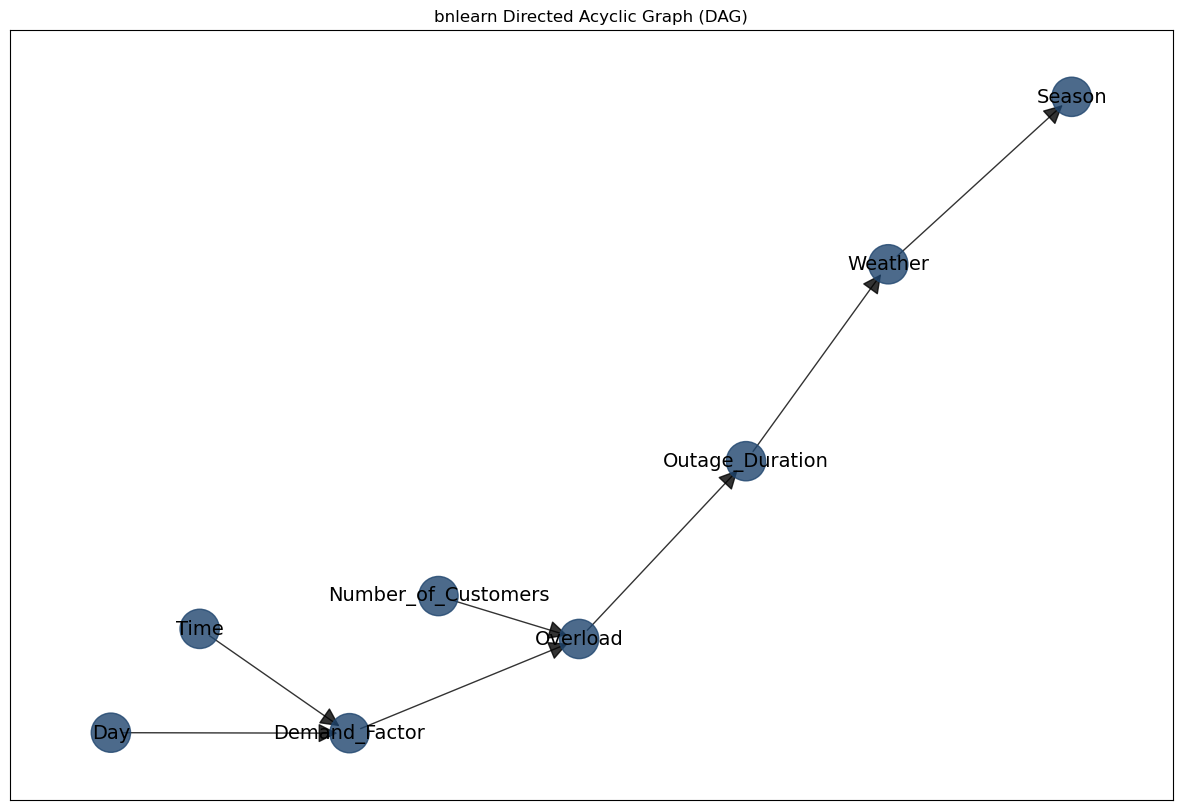

In [8]:
model = bn.structure_learning.fit(df)

G = bn.plot(model)


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Outage_Duration:
+-------------------------------+--------------------+---------------------+
| Overload                      | Overload(No)       | Overload(Yes)       |
+-------------------------------+--------------------+---------------------+
| Outage_Duration(Less_than_1H) | 0.3964248159831756 | 0.5874499332443258  |
+-------------------------------+--------------------+---------------------+
| Outage_Duration(More_than_1H) | 0.6035751840168244 | 0.41255006675567424 |
+-------------------------------+--------------------+---------------------+
[bnlearn] >CPD of Weather:
+-----------------+-------------------------------+-------------------------------+
| Outage_Duration | Outage_Duration(Less_than_1H) | Outage_Duration(More_than_1H) |
+-----------------+------------------

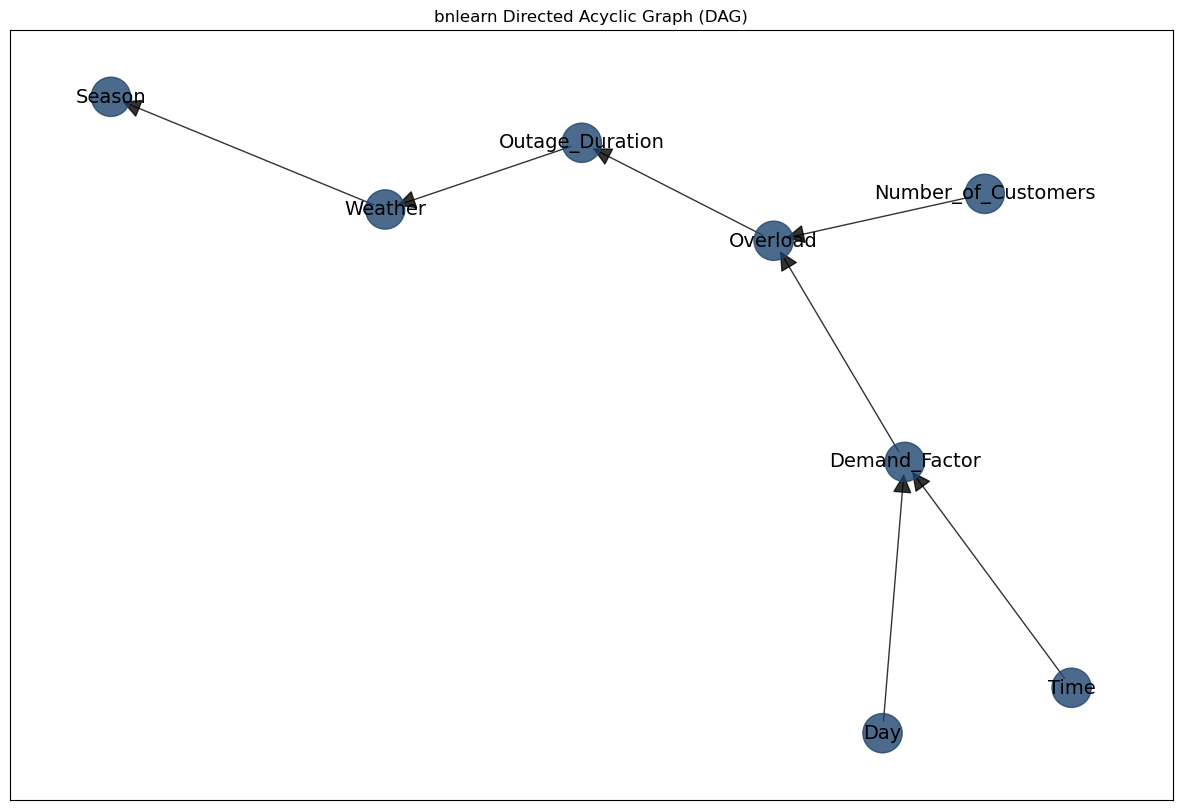

In [9]:
# learn the parameters of the DAG using the df
model_update = bn.parameter_learning.fit(model, df, methodtype="bayes")

# Make plot
G = bn.plot(model_update)

In [10]:
# P(Outage_Duration=Less_than_1H | Time=Morning, Demand_Factor=Medium)
a = bn.inference.fit(model_update, variables =["Outage_Duration" ], evidence={"Time":"Morning", "Demand_Factor":"Medium"})


[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-------------------+----------+
|    | Outage_Duration   |        p |
+====+===================+==========+
|  0 | Less_than_1H      | 0.482832 |
+----+-------------------+----------+
|  1 | More_than_1H      | 0.517168 |
+----+-------------------+----------+


In [11]:
# P(Demand_Factor=High | Overload=Yes, Time=Afternoon)

b = bn.inference.fit(model_update, variables=["Demand_Factor"], evidence={"Overload":"Yes","Weather":" Cold"})


[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------+----------+
|    | Demand_Factor   |        p |
+====+=================+==========+
|  0 | High            | 0.367494 |
+----+-----------------+----------+
|  1 | Low             | 0.33314  |
+----+-----------------+----------+
|  2 | Medium          | 0.299365 |
+----+-----------------+----------+


In [12]:
# P(Number_of_Customers=Low | Demand_Factor=High)
c = bn.inference.fit(model_update, variables=["Number_of_Customers"], evidence={"Demand_Factor":"High"})


[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------------+----------+
|    | Number_of_Customers   |        p |
+====+=======================+==========+
|  0 | High                  | 0.461176 |
+----+-----------------------+----------+
|  1 | Low                   | 0.538824 |
+----+-----------------------+----------+


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1b

Explore this package and try to make a few more inferences (at least three) based on your interest.


In [13]:
# write your code here
d = bn.inference.fit(model_update, variables=["Number_of_Customers"], evidence={"Day":"Weekdays"})

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------------+----------+
|    | Number_of_Customers   |        p |
+====+=======================+==========+
|  0 | High                  | 0.461176 |
+----+-----------------------+----------+
|  1 | Low                   | 0.538824 |
+----+-----------------------+----------+


In [14]:
e = bn.inference.fit(model_update, variables=["Season","Weather"], evidence={"Time":"Morning"})

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+----------+-----------+-----------+
|    | Season   | Weather   |         p |
+====+==========+===========+===========+
|  0 | Autumn   | Cold      | 0.145356  |
+----+----------+-----------+-----------+
|  1 | Autumn   | Warm      | 0.10818   |
+----+----------+-----------+-----------+
|  2 | Spring   | Cold      | 0.134175  |
+----+----------+-----------+-----------+
|  3 | Spring   | Warm      | 0.112296  |
+----+----------+-----------+-----------+
|  4 | Summer   | Cold      | 0.0971001 |
+----+----------+-----------+-----------+
|  5 | Summer   | Warm      | 0.153451  |
+----+----------+-----------+-----------+
|  6 | Winter   | Cold      | 0.168307  |
+----+----------+-----------+-----------+
|  7 | Winter   | Warm      | 0.0811352 |
+----+----------+-----------+-----------+


In [15]:
f = bn.inference.fit(model_update, variables=["Weather","Number_of_Customers"], evidence={"Time":"Morning"})

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------+-----------------------+----------+
|    | Weather   | Number_of_Customers   |        p |
+====+===========+=======================+==========+
|  0 | Cold      | High                  | 0.250658 |
+----+-----------+-----------------------+----------+
|  1 | Cold      | Low                   | 0.29428  |
+----+-----------+-----------------------+----------+
|  2 | Warm      | High                  | 0.210519 |
+----+-----------+-----------------------+----------+
|  3 | Warm      | Low                   | 0.244544 |
+----+-----------+-----------------------+----------+
